In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
x = np.array([-600,-600,-600,0,0,0,100,100,100,200,200,200,300,300,300,400,400,400,500,500,500,600,600,600,700,700,700,800,
             800,800,900,900,900,1000,1000,1000,1600,1600,1600])

y = np.array([600,0,-600,600,0,-600,600,0,-600,600,0,-600,600,0,-600,600,0,-600,600,0,-600,600,0,-600,600,0,-600,600,0,-600,600,0,-600,600,0,-600,600,0,-600])
pressure=np.array([202.4375,202.4375,202.4375,202.4375,97.7387770089102,202.4375,202.4375,97.7387770089102,202.4375,202.4375,97.7387770089102,202.4375,202.4375,97.7387770089102,202.4375,
                  202.4375,97.7387770089102,202.4375,202.4375,97.7387770089102,202.4375,202.4375,97.7387770089102,202.4375,
                  202.4375,97.7387770089102,202.4375,202.4375,97.7387770089102,202.4375,202.4375,97.7387770089102,202.4375,
                  202.4375,97.7387770089102,202.4375,202.4375,202.4375,202.4375])
df = pd.DataFrame({"коордната X": x,
                   "координата Y": y,
                  "давление": pressure})
df.head()


,коордната X,координата Y,давление
0,-600,600,202.437500
1,-600,0,202.437500
2,-600,-600,202.437500
3,0,600,202.437500
4,0,0,97.738777


In [5]:
df = df.groupby(['коордната X', 'координата Y']).mean()
df.head()

давление
коордната X координата Y            
-600        -600          202.437500
             0            202.437500
             600          202.437500
 0          -600          202.437500
             0             97.738777

In [6]:
df = df.unstack(level=0)
df

давление                                                  \
коордната X      -600         0           100         200         300    
координата Y                                                             
-600          202.4375  202.437500  202.437500  202.437500  202.437500   
 0            202.4375   97.738777   97.738777   97.738777   97.738777   
 600          202.4375  202.437500  202.437500  202.437500  202.437500   

                                                                          \
коордната X         400         500         600         700         800    
координата Y                                                               
-600          202.437500  202.437500  202.437500  202.437500  202.437500   
 0             97.738777   97.738777   97.738777   97.738777   97.738777   
 600          202.437500  202.437500  202.437500  202.437500  202.437500   

                                                
коордната X         900         1000      1600  
координата Y                                    
-600          202.437500  202.437500  202.4375  
 0             97.738777   97.738777  202.4375  
 600          202.437500  202.437500  202.4375

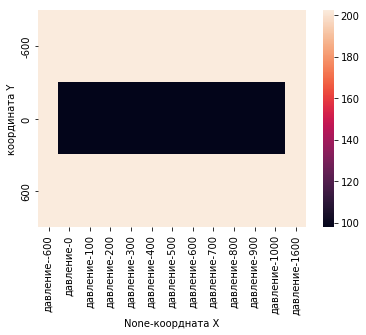

In [7]:

sns.heatmap(df)

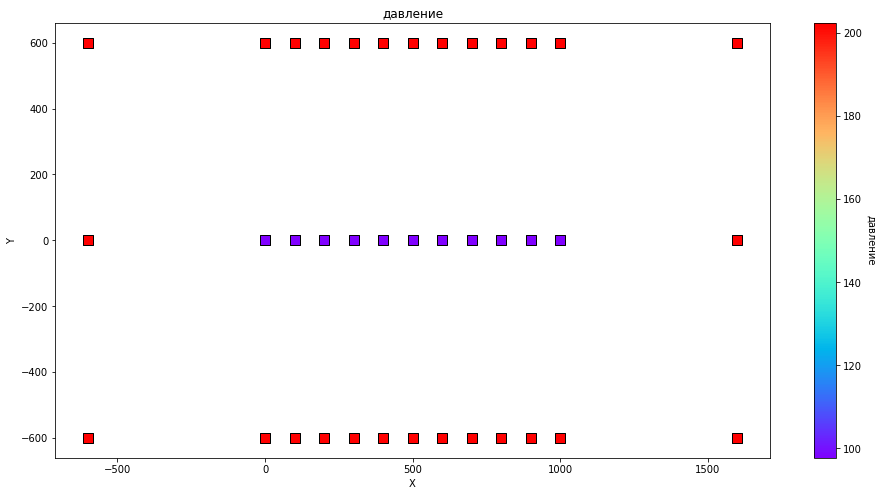

In [4]:
n = df.shape[0]
fig, ax1 = plt.subplots(1, 1, figsize=(16, 8))

im = ax1.scatter(
df['коордната X'],
df['координата Y'],
cmap='rainbow',
c=df['давление'],
marker='s', # можно любой выбрать, как у тебя точки будут отображаться
edgecolors='black', # тоже,
s=100) # рамер фигурки)
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('давление',
rotation=-90,
va="bottom")
    
    
ax1.set_title('давление')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
    
plt.show()